In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os
import shutil
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img, img_to_array
from sklearn.utils import resample
import random
import warnings
from sklearn import preprocessing
import streamlit as st
import seaborn as sns

In [2]:
data1 = pd.read_csv("training_solutions_rev1.csv")
data1.columns = [col.lower().replace('.', '_') for col in data1.columns]
df1 = data1.copy()
df1

,galaxyid,class1_1,class1_2,class1_3,class2_1,class2_2,class3_1,class3_2,class4_1,class4_2,...,class9_3,class10_1,class10_2,class10_3,class11_1,class11_2,class11_3,class11_4,class11_5,class11_6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


espiral

In [3]:
df1_1 = df1[(df1["class1_2"] > df1[["class1_1", "class1_3"]].max(axis=1)) & (df1["class2_2"] > df1["class2_1"]) & (df1["class4_1"] > df1["class4_2"])]
df1_1

,galaxyid,class1_1,class1_2,class1_3,class2_1,class2_2,class3_1,class3_2,class4_1,class4_2,...,class9_3,class10_1,class10_2,class10_3,class11_1,class11_2,class11_3,class11_4,class11_5,class11_6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000
8,100134,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.021751,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894
14,100237,0.164391,0.800759,0.034850,0.030795,0.769964,0.149037,0.620928,0.387742,0.382223,...,0.000000,0.208685,0.179056,0.000000,0.032728,0.140980,0.000000,0.000000,0.089185,0.124848
20,100335,0.165002,0.834998,0.000000,0.235325,0.599673,0.148674,0.450999,0.378226,0.221447,...,0.078442,0.047278,0.236391,0.094556,0.141835,0.094556,0.000000,0.000000,0.000000,0.141835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61551,999530,0.482123,0.501231,0.016646,0.000000,0.501231,0.000000,0.501231,0.387611,0.113620,...,0.000000,0.338325,0.000000,0.049286,0.000000,0.000000,0.000000,0.000000,0.000000,0.387611
61563,999777,0.013522,0.983796,0.002681,0.015684,0.968112,0.590285,0.377827,0.924279,0.043833,...,0.000000,0.346315,0.327666,0.250298,0.025757,0.832544,0.041435,0.000000,0.000000,0.024542
61566,999795,0.129878,0.867781,0.002341,0.066500,0.801281,0.598990,0.202291,0.550301,0.250981,...,0.000000,0.249742,0.172674,0.127884,0.142373,0.048823,0.038712,0.000000,0.123529,0.196864
61568,999875,0.020285,0.979715,0.000000,0.207551,0.772164,0.315305,0.456860,0.722483,0.049681,...,0.137853,0.074294,0.029641,0.618548,0.027295,0.638331,0.000000,0.000000,0.000000,0.056857


In [4]:
df1_A_N = df1_1[(df1_1["class10_1"] > df1_1[["class10_2", "class10_3"]].max(axis=1)) & (df1_1["class3_1"] < df1_1["class3_2"])]['galaxyid']
df1_A_B = df1_1[(df1_1["class10_1"] > df1_1[["class10_2", "class10_3"]].max(axis=1)) & (df1_1["class3_1"] > df1_1["class3_2"])]['galaxyid']

In [5]:
df1_A_N

0        100008
8        100134
14       100237
23       100382
42       100673
          ...  
61525    999093
61534    999264
61538    999307
61541    999354
61551    999530
Name: galaxyid, Length: 5919, dtype: int64

In [6]:
df1_A_B

24       100383
82       101275
191      102742
323      104624
337      104934
          ...  
61469    998339
61530    999137
61546    999423
61563    999777
61566    999795
Name: galaxyid, Length: 901, dtype: int64

In [7]:
df1_B_N = df1_1[(df1_1["class10_2"] > df1_1[["class10_1", "class10_3"]].max(axis=1)) & (df1_1["class3_1"] < df1_1["class3_2"])]['galaxyid']
df1_B_B = df1_1[(df1_1["class10_2"] > df1_1[["class10_1", "class10_3"]].max(axis=1)) & (df1_1["class3_1"] > df1_1["class3_2"])]['galaxyid']

In [8]:
df1_B_N

20       100335
21       100367
51       100813
52       100821
74       101166
          ...  
61484    998492
61521    999003
61523    999035
61544    999415
61549    999502
Name: galaxyid, Length: 4342, dtype: int64

In [9]:
df1_B_B

71       101140
88       101298
127      101756
152      102027
219      103075
          ...  
61389    997244
61399    997348
61455    998133
61472    998355
61494    998579
Name: galaxyid, Length: 1783, dtype: int64

In [10]:
df1_C_N = df1_1[(df1_1["class10_3"] > df1_1[["class10_1", "class10_2"]].max(axis=1)) & (df1_1["class3_1"] < df1_1["class3_2"])]['galaxyid']
df1_C_B = df1_1[(df1_1["class10_3"] > df1_1[["class10_1", "class10_2"]].max(axis=1)) & (df1_1["class3_1"] > df1_1["class3_2"])]['galaxyid']

In [11]:
df1_C_N

56       100859
78       101244
134      101807
169      102391
468      106885
          ...  
61302    995993
61360    996835
61364    996854
61568    999875
61576    999964
Name: galaxyid, Length: 1343, dtype: int64

In [12]:
df1_C_B

1        100023
90       101307
162      102243
176      102474
221      103159
          ...  
61197    994288
61240    994989
61274    995429
61406    997456
61490    998542
Name: galaxyid, Length: 652, dtype: int64

In [13]:
dicc_length = {'df3_L3_B': 82,
'df3_L3_N': 366,
'df3_L2_B': 1494,
'df3_L2_N': 6233,
'df3_L1_B': 840,
'df3_L1_N': 5529,
'df2_2': 15304,
'df1_C_B': 652,
'df1_C_N': 1343,
'df1_B_B': 1783,
'df1_B_N': 4342,
'df1_A_B': 901,
'df1_A_N': 5919}

In [17]:
dicc_length = {
    'lenticular_L3_B': 82, 'lenticular_L3_N': 366, 'lenticular_L2_B': 1494, 'lenticular_L2_N': 6233, 
    'lenticular_L1_B': 840, 'lenticular_L1_N': 5529, 'eliptica_2': 15304, 'espiral_C_B': 652, 
    'espiral_C_N': 1343, 'espiral_B_B': 1783, 'espiral_B_N': 4342, 'espiral_A_B': 901, 'espiral_A_N': 5919
}

df = pd.DataFrame(list(dicc_length.items()), columns=['DataFrame', 'Length'])
df

,DataFrame,Length
0,lenticular_L3_B,82
1,lenticular_L3_N,366
2,lenticular_L2_B,1494
3,lenticular_L2_N,6233
4,lenticular_L1_B,840
5,lenticular_L1_N,5529
6,eliptica_2,15304
7,espiral_C_B,652
8,espiral_C_N,1343
9,espiral_B_B,1783


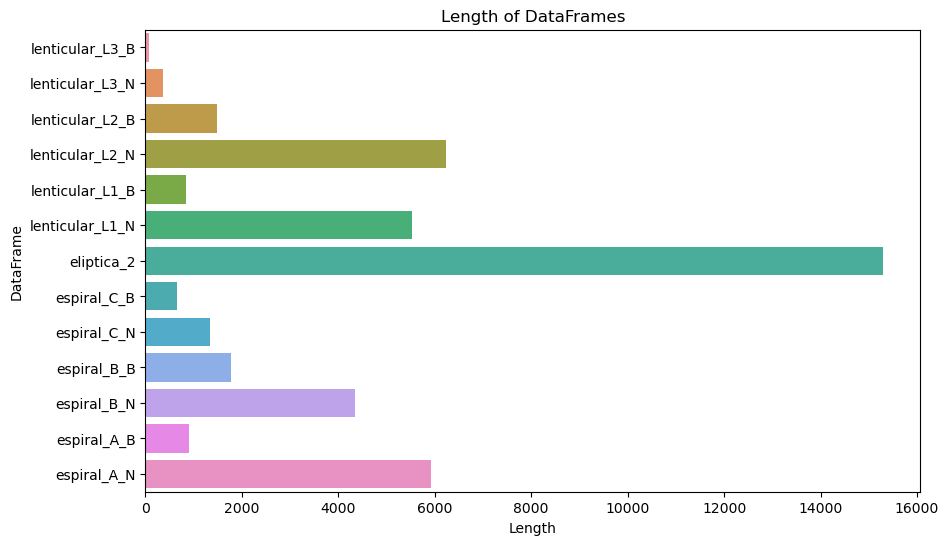

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Length', y='DataFrame', data=df, orient='h')
plt.title('Length of DataFrames')
plt.xlabel('Length')
plt.ylabel('DataFrame')
plt.show()

In [19]:
# Restar 1500 y reemplazar los valores negativos por 0
df['Length'] = df['Length'].apply(lambda x: max(1500 - x, 0))
df

,DataFrame,Length
0,lenticular_L3_B,1418
1,lenticular_L3_N,1134
2,lenticular_L2_B,6
3,lenticular_L2_N,0
4,lenticular_L1_B,660
5,lenticular_L1_N,0
6,eliptica_2,0
7,espiral_C_B,848
8,espiral_C_N,157
9,espiral_B_B,0


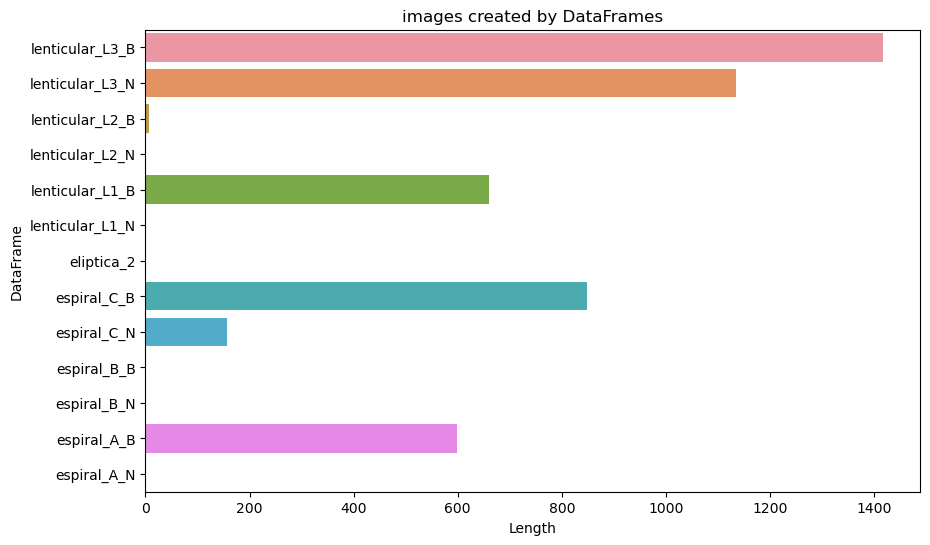

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Length', y='DataFrame', data=df, orient='h')
plt.title('images created by DataFrames')
plt.xlabel('Length')
plt.ylabel('DataFrame')
plt.show()

In [21]:
# Cambiar el valor en la columna "Length" a 1500
df['Length'] = 1500
df

,DataFrame,Length
0,lenticular_L3_B,1500
1,lenticular_L3_N,1500
2,lenticular_L2_B,1500
3,lenticular_L2_N,1500
4,lenticular_L1_B,1500
5,lenticular_L1_N,1500
6,eliptica_2,1500
7,espiral_C_B,1500
8,espiral_C_N,1500
9,espiral_B_B,1500


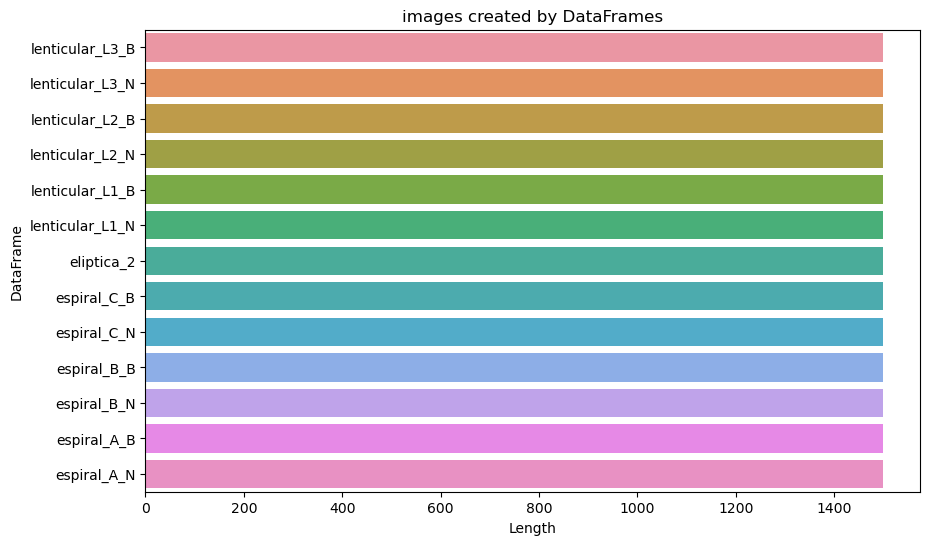

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Length', y='DataFrame', data=df, orient='h')
plt.title('images created by DataFrames')
plt.xlabel('Length')
plt.ylabel('DataFrame')
plt.show()

elliptical

In [14]:
df2_1 = df1[df1["class1_1"] > df1[["class1_2", "class1_3"]].max(axis=1)]
df2_2 = df2_1[df2_1[["class8_3", "class8_4"]].max(axis=1) < df2_1[["class8_1", "class8_2", "class8_5", "class8_6", "class8_7"]].max(axis=1)]['galaxyid'][0:1500]

In [15]:
df2_1

,galaxyid,class1_1,class1_2,class1_3,class2_1,class2_2,class3_1,class3_2,class4_1,class4_2,...,class9_3,class10_1,class10_2,class10_3,class11_1,class11_2,class11_3,class11_4,class11_5,class11_6
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.0,0.094549,0.0,0.094549,0.189098,0.0,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
5,100122,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
6,100123,0.462492,0.456033,0.081475,0.000000,0.456033,0.000000,0.456033,0.000000,0.456033,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61567,999873,0.531642,0.431270,0.037088,0.000000,0.431270,0.000000,0.431270,0.000000,0.431270,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
61572,999936,0.545443,0.454557,0.000000,0.056820,0.397737,0.126909,0.270828,0.000000,0.397737,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.0,0.226257,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [16]:
df2_2

3       100078
4       100090
6       100123
7       100128
17      100288
         ...  
5917    187647
5918    187656
5928    187820
5929    187828
5931    187836
Name: galaxyid, Length: 1500, dtype: int64

lenticular

In [17]:
df3_1 = df1[df1["class1_2"] > df1[["class1_1", "class1_3"]].max(axis=1)]
df3_2 = df3_1[df3_1["class4_2"] > df3_1["class4_1"]]
df3_L1_N = df3_2[(df3_2["class5_2"] > df3_2[["class5_1", "class5_3", "class5_4"]].max(axis=1)) & (df3_2["class3_1"] < df3_2["class3_2"])]['galaxyid'][0:1500]
df3_L1_B = df3_2[(df3_2["class5_2"] > df3_2[["class5_1", "class5_3", "class5_4"]].max(axis=1)) & (df3_2["class3_1"] > df3_2["class3_2"])]['galaxyid'][0:1500]
df3_L2_N = df3_2[(df3_2["class5_3"] > df3_2[["class5_1", "class5_2", "class5_4"]].max(axis=1)) & (df3_2["class3_1"] < df3_2["class3_2"])]['galaxyid'][0:1500]
df3_L2_B = df3_2[(df3_2["class5_3"] > df3_2[["class5_1", "class5_2", "class5_4"]].max(axis=1)) & (df3_2["class3_1"] > df3_2["class3_2"])]['galaxyid'][0:1500]
df3_L3_N = df3_2[(df3_2["class5_4"] > df3_2[["class5_1", "class5_3", "class5_2"]].max(axis=1)) & (df3_2["class3_1"] < df3_2["class3_2"])]['galaxyid'][0:1500]
df3_L3_B = df3_2[(df3_2["class5_4"] > df3_2[["class5_1", "class5_3", "class5_2"]].max(axis=1)) & (df3_2["class3_1"] > df3_2["class3_2"])]['galaxyid'][0:1500]

In [18]:
df3_L1_N

11       100157
13       100204
29       100445
34       100513
37       100561
          ...  
16002    336716
16015    336911
16020    336983
16024    337082
16035    337251
Name: galaxyid, Length: 1500, dtype: int64

In [19]:
df3_L1_B

283      104131
332      104788
617      108947
723      110707
791      111791
          ...  
61089    992546
61127    993037
61138    993151
61268    995367
61305    996040
Name: galaxyid, Length: 840, dtype: int64

In [20]:
df3_L2_N

10       100150
15       100259
16       100263
33       100506
35       100520
          ...  
14914    320862
14920    320931
14941    321186
14946    321276
14969    321648
Name: galaxyid, Length: 1500, dtype: int64

In [21]:
df3_L2_B

12       100187
99       101427
120      101660
124      101701
131      101788
          ...  
61387    997199
61401    997372
61450    998059
61464    998252
61502    998661
Name: galaxyid, Length: 1494, dtype: int64

In [22]:
df3_L3_N

19       100322
227      103255
1200     117915
1266     119147
1894     128380
          ...  
59293    966141
60016    976767
60985    990743
61361    996836
61532    999199
Name: galaxyid, Length: 366, dtype: int64

In [23]:
df3_L3_B

906      113556
1253     118941
1329     119967
1667     124877
4393     165725
          ...  
57558    940414
58795    959155
58905    960663
59309    966420
60299    981578
Name: galaxyid, Length: 82, dtype: int64

In [24]:
trainimages_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/images_training_rev1"

SPIRAL_A_NyB

In [25]:
train_spiral_A_N = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_N"

In [26]:
for index in df1_A_N:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_spiral_A_N)
    else:
        print('la imagen NO ha sido copiada')

In [28]:
train_spiral_A_B = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B"

In [29]:
for index in df1_A_B:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_spiral_A_B)
    else:
        print('la imagen NO ha sido copiada')

In [30]:
# Número total de imágenes que quieres crear, incluyendo las originales
total_images = 1500
# Número de imágenes originales
original_images = 901
# Número de imágenes que se generarán por cada imagen original
augmentation_factor = (total_images - original_images) // original_images
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2)
# Generación de imágenes aumentadas
for root, dirs, files in os.walk(train_spiral_A_B):
    for filename in files:
        img_path = os.path.join(root, filename)
        print(root)
        print(filename)

C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
100383.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
101275.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
102742.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
104624.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
104934.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
107379.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
112623.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
113402.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
115515.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
115587.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
119501.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_A_B
122525.jpg
C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_M

In [31]:
# Número total de imágenes que quieres crear, incluyendo las originales
total_images = 1500
# Número de imágenes originales
original_images = 901
# Número de imágenes que se generarán por cada imagen original
augmentation_factor = (total_images - original_images) // original_images
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2)
# Generación de imágenes aumentadas
for root, dirs, files in os.walk(train_spiral_A_B):
    for filename in files:
        img_path = os.path.join(root, filename)
        img_name, img_extension = os.path.splitext(filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)        
        i = 0
        for batch in datagen.flow(x, batch_size=64, save_to_dir=train_spiral_A_B, save_prefix=img_name, save_format='jpg'):
            i += 1
            if i > augmentation_factor:
                break  # detener el bucle después de haber generado el número deseado de imágenes aumentadas
print("Se han creado", total_images, "imágenes aumentadas.")

Se han creado 1500 imágenes aumentadas.


SPIRAL_B_NyB

In [32]:
train_spiral_B_N = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_B_N"

In [33]:
for index in df1_B_N:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_spiral_B_N)
    else:
        print('la imagen NO ha sido copiada')

In [34]:
train_spiral_B_B = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_B_B"

In [35]:
for index in df1_B_N:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_spiral_B_B)
    else:
        print('la imagen NO ha sido copiada')

SPIRAL_C_NyB

In [36]:
train_spiral_C_N = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_C_N"

In [37]:
for index in df1_C_N:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_spiral_C_N)
    else:
        print('la imagen NO ha sido copiada')

In [38]:
# Número total de imágenes que quieres crear, incluyendo las originales
total_images = 1500
# Número de imágenes originales
original_images = 1343
# Número de imágenes que se generarán por cada imagen original
augmentation_factor = (total_images - original_images) // original_images
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2)
# Generación de imágenes aumentadas
for root, dirs, files in os.walk(train_spiral_C_N):
    for filename in files:
        img_path = os.path.join(root, filename)
        img_name, img_extension = os.path.splitext(filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)        
        i = 0
        for batch in datagen.flow(x, batch_size=64, save_to_dir=train_spiral_C_N, save_prefix=img_name, save_format='jpg'):
            i += 1
            if i > augmentation_factor:
                break  # detener el bucle después de haber generado el número deseado de imágenes aumentadas
print("Se han creado", total_images, "imágenes aumentadas.")

Se han creado 1500 imágenes aumentadas.


In [39]:
train_spiral_C_B = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/SPIRAL_C_B"

In [40]:
for index in df1_C_B:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_spiral_C_B)
    else:
        print('la imagen NO ha sido copiada')

In [41]:
# Número total de imágenes que quieres crear, incluyendo las originales
total_images = 1500
# Número de imágenes originales
original_images = 652
# Número de imágenes que se generarán por cada imagen original
augmentation_factor = (total_images - original_images) // original_images
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2)
# Generación de imágenes aumentadas
for root, dirs, files in os.walk(train_spiral_C_B):
    for filename in files:
        img_path = os.path.join(root, filename)
        img_name, img_extension = os.path.splitext(filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)        
        i = 0
        for batch in datagen.flow(x, batch_size=64, save_to_dir=train_spiral_C_B, save_prefix=img_name, save_format='jpg'):
            i += 1
            if i > augmentation_factor:
                break  # detener el bucle después de haber generado el número deseado de imágenes aumentadas
print("Se han creado", total_images, "imágenes aumentadas.")

Se han creado 1500 imágenes aumentadas.


ELLIPTICAL

In [42]:
train_elliptical = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/ELLIPTICAL"

In [43]:
for index in df2_2:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_elliptical)
    else:
        print('la imagen NO ha sido copiada')

LENTICULAR_1_NyB

In [44]:
train_lenticular_1_N = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/LENTICULAR_1_N"

In [45]:
for index in df3_L1_N:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_lenticular_1_N)
    else:
        print('la imagen NO ha sido copiada')

In [46]:
train_lenticular_1_B = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/LENTICULAR_1_B"

In [47]:
for index in df3_L1_B:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_lenticular_1_B)
    else:
        print('la imagen NO ha sido copiada')

In [48]:
# Número total de imágenes que quieres crear, incluyendo las originales
total_images = 1500
# Número de imágenes originales
original_images = 840
# Número de imágenes que se generarán por cada imagen original
augmentation_factor = (total_images - original_images) // original_images
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2)
# Generación de imágenes aumentadas
for root, dirs, files in os.walk(train_lenticular_1_B):
    for filename in files:
        img_path = os.path.join(root, filename)
        img_name, img_extension = os.path.splitext(filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)        
        i = 0
        for batch in datagen.flow(x, batch_size=64, save_to_dir=train_lenticular_1_B, save_prefix=img_name, save_format='jpg'):
            i += 1
            if i > augmentation_factor:
                break  # detener el bucle después de haber generado el número deseado de imágenes aumentadas
print("Se han creado", total_images, "imágenes aumentadas.")

Se han creado 1500 imágenes aumentadas.


LENTICULAR_2_NyB

In [49]:
train_lenticular_2_N = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/LENTICULAR_2_N"

In [50]:
for index in df3_L2_N:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_lenticular_2_N)
    else:
        print('la imagen NO ha sido copiada')

In [51]:
train_lenticular_2_B = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/LENTICULAR_2_B"

In [52]:
for index in df3_L2_B:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_lenticular_2_B)
    else:
        print('la imagen NO ha sido copiada')

In [53]:
# Número total de imágenes que quieres crear, incluyendo las originales
total_images = 1500
# Número de imágenes originales
original_images = 1494
# Número de imágenes que se generarán por cada imagen original
augmentation_factor = (total_images - original_images) // original_images
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2)
# Generación de imágenes aumentadas
for root, dirs, files in os.walk(train_lenticular_2_B):
    for filename in files:
        img_path = os.path.join(root, filename)
        img_name, img_extension = os.path.splitext(filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)        
        i = 0
        for batch in datagen.flow(x, batch_size=64, save_to_dir=train_lenticular_2_B, save_prefix=img_name, save_format='jpg'):
            i += 1
            if i > augmentation_factor:
                break  # detener el bucle después de haber generado el número deseado de imágenes aumentadas
print("Se han creado", total_images, "imágenes aumentadas.")

Se han creado 1500 imágenes aumentadas.


LENTICULAR_3_NYb

In [54]:
train_lenticular_3_N = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/LENTICULAR_3_N"

In [55]:
for index in df3_L3_N:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_lenticular_3_N)
    else:
        print('la imagen NO ha sido copiada')

In [56]:
# Número total de imágenes que quieres crear, incluyendo las originales
total_images = 1500

# Número de imágenes originales
original_images = 366

# Número de imágenes que se generarán por cada imagen original
augmentation_factor = (total_images - original_images) // original_images

# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2
)

# Generación de imágenes aumentadas
for root, dirs, files in os.walk(train_lenticular_3_N):
    for filename in files:
        img_path = os.path.join(root, filename)
        img_name, img_extension = os.path.splitext(filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        
        i = 0
        for batch in datagen.flow(x, batch_size=64, save_to_dir=train_lenticular_3_N, save_prefix=img_name, save_format='jpg'):
            i += 1
            if i > augmentation_factor:
                break  # detener el bucle después de haber generado el número deseado de imágenes aumentadas

print("Se han creado", total_images, "imágenes aumentadas.")


Se han creado 1500 imágenes aumentadas.


In [57]:
train_lenticular_3_B = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_MULTI/LENTICULAR_3_B"

In [58]:
for index in df3_L3_B:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    if os.path.exists(image_path):
        shutil.copy(image_path, train_lenticular_3_B)
    else:
        print('la imagen NO ha sido copiada')

In [59]:
# Número total de imágenes que quieres crear, incluyendo las originales
total_images = 1500
# Número de imágenes originales
original_images = 82
# Número de imágenes que se generarán por cada imagen original
augmentation_factor = (total_images - original_images) // original_images
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2)
# Generación de imágenes aumentadas
for root, dirs, files in os.walk(train_lenticular_3_B):
    for filename in files:
        img_path = os.path.join(root, filename)
        img_name, img_extension = os.path.splitext(filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)     
        i = 0
        for batch in datagen.flow(x, batch_size=64, save_to_dir=train_lenticular_3_B, save_prefix=img_name, save_format='jpg'):
            i += 1
            if i > augmentation_factor:
                break  # detener el bucle después de haber generado el número deseado de imágenes aumentadas
print("Se han creado", total_images, "imágenes aumentadas.")


Se han creado 1500 imágenes aumentadas.
